UNAD

Diana Marcela Castiblanco Sanchez

Agrupamiento en K-means

Grupo 202016908_35

1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [17]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [19]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.

In [36]:
# Identificación de Datos Faltantes
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].mean())
Datos['Embarked'] = Datos['Embarked'].fillna('S')

In [34]:
# Realizamos lectura de los Datos para el análisis exploratorio
Datos.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
#Se realiza la confirmacion de las columnas
Datos.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Age'>

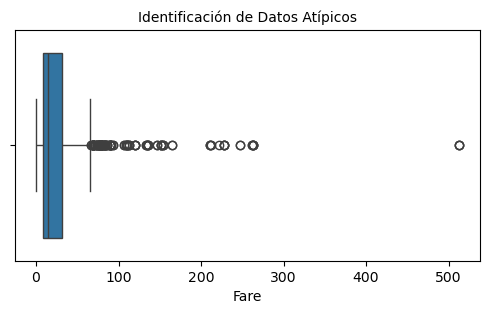

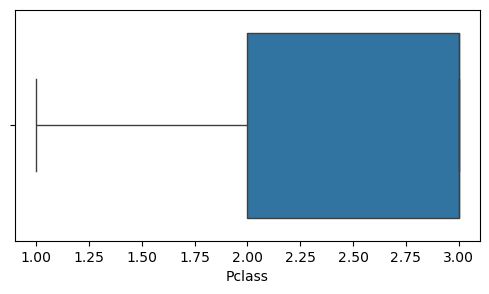

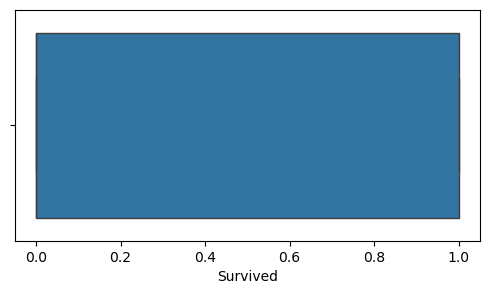

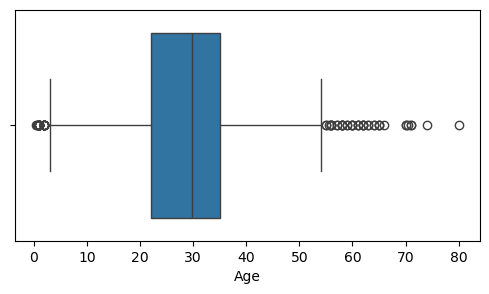

In [40]:
#Se realiza el análisis para realizar la exploracion de datos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10)

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Survived'])

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])

In [44]:
#Se realiza la definicion de los límites para datos los atípicos
max_fare = 300
min_fare = 0
total_fare = ((Datos['Fare'] < min_fare) | (Datos['Fare'] > max_fare)).sum()

print("Total registros dataset: {}".format(len(Datos)))
print("El total de datos atípicos para los registros para la tarifa es {}".format(total_fare))
print("")
Datos.info()

Total registros dataset: 891
El total de datos atípicos para los registros para la tarifa es 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
#Realizar la codificación de variables categóricas
label_encoder = LabelEncoder()
Datos['Sex'] = label_encoder.fit_transform(Datos['Sex'])
Datos['Embarked'] = label_encoder.fit_transform(Datos['Embarked'])

3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.

In [55]:
#Realizacioón de la Selección de características
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = Datos[features]
Y = Datos['Survived']
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [51]:
# Se permite realizar la validacion de los datos en train
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
105,3,1,28.0,0,0,7.8958,2
68,3,0,17.0,4,2,7.9250,2


In [57]:
# Se permite realizar la validacion de los datos en test
X_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,1,29.699118,0,0,14.4583,0
648,3,1,29.699118,0,0,7.5500,2


5. Entrenar el modelo configurando los diferentes 
hiperparámetros

In [60]:
#Se permite Crear y entrenar el modelo de regresión logística
modelo_clasificacion = LogisticRegression(max_iter=1000)
modelo_clasificacion.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [64]:
# Se permite realiza las predicciones
Prediccion = modelo_clasificacion.predict(X_test)

6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.

In [67]:
# Se permite realiza la evaluación del modelo
print('Accuracy:', accuracy_score(Y_test, Prediccion))
print('Precision:', precision_score(Y_test, Prediccion))
print('Recall:', recall_score(Y_test, Prediccion))
print('F1 Score:', f1_score(Y_test, Prediccion))

Accuracy: 0.7937219730941704
Precision: 0.7261904761904762
Recall: 0.7261904761904762
F1 Score: 0.7261904761904762


7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.

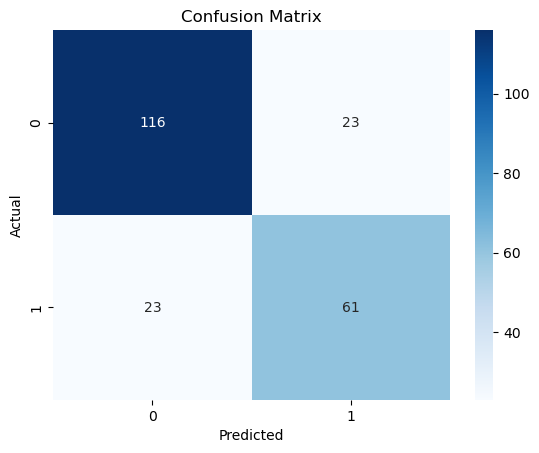

In [72]:
# Realización de la Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Prediccion)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [74]:
# Se permite realizar los Coeficientes del Modelo
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': modelo_clasificacion.coef_[0]
})
print(coefficients)

    Feature  Coefficient
0    Pclass    -0.971747
1       Sex    -2.599718
2       Age    -0.038521
3     SibSp    -0.338193
4     Parch    -0.047463
5      Fare     0.001429
6  Embarked    -0.220504


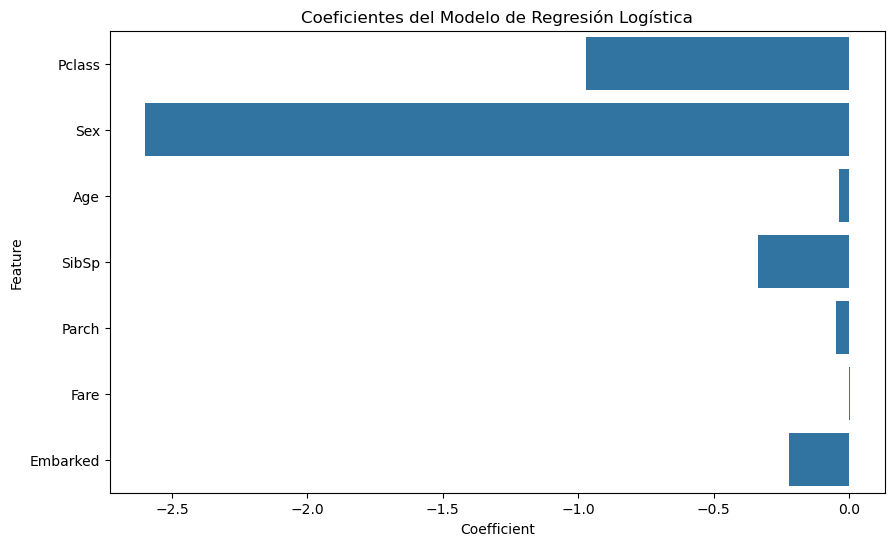

In [77]:
# Se realiza Gráfica de Coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.show()

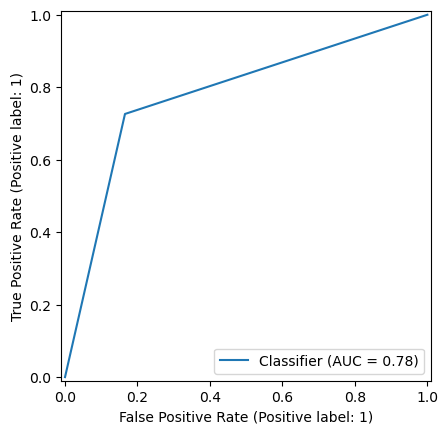

In [79]:
#curva de precisión del modelo 

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()